In [ ]:
#DATA PREPROCESSING

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/vijethjayashekar/Documents/SEM 3/AIT 664/Project/cleaned_youth_tobacco_data.csv"
data = pd.read_csv(file_path)

# Features and target variable
features = ['YEAR', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
            'High_Confidence_Limit', 'Sample_Size']
target_variable = 'Data_Value'

# Step 1: Check Summary Statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
               YEAR    Data_Value  Data_Value_Std_Err  Low_Confidence_Limit  \
count  10076.000000  10076.000000        10076.000000          10076.000000   
mean    2006.867705     20.319035            1.850973             16.703374   
std        5.417412     21.153165            1.777582             18.559545   
min     1999.000000      0.000000            0.000000              0.000000   
25%     2002.000000      3.000000            0.600000              1.700000   
50%     2006.000000     10.500000            1.300000              7.900000   
75%     2011.000000     36.400000            2.400000             29.600000   
max     2017.000000     98.000000           16.100000             97.600000   

       High_Confidence_Limit   Sample_Size  DisplayOrder  
count           10076.000000  10076.000000  10076.000000  
mean               23.943132   1483.832572      8.343092  
std                23.967822   2189.891960      2.945307  
min                 0.000000    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

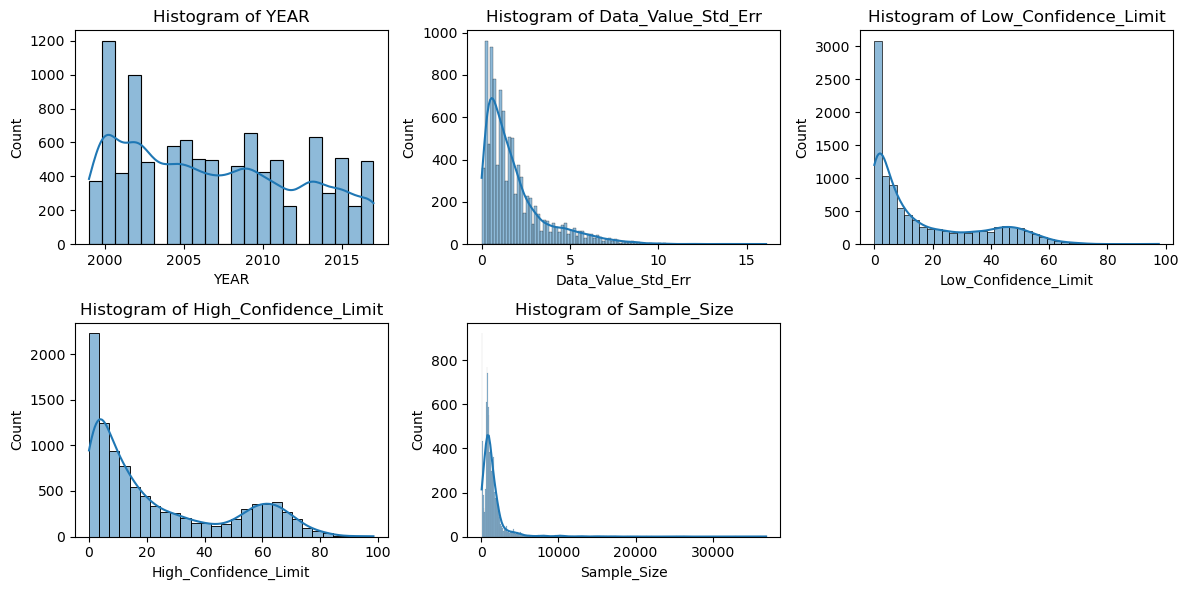

In [28]:
# Step 2: Visualize Data
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

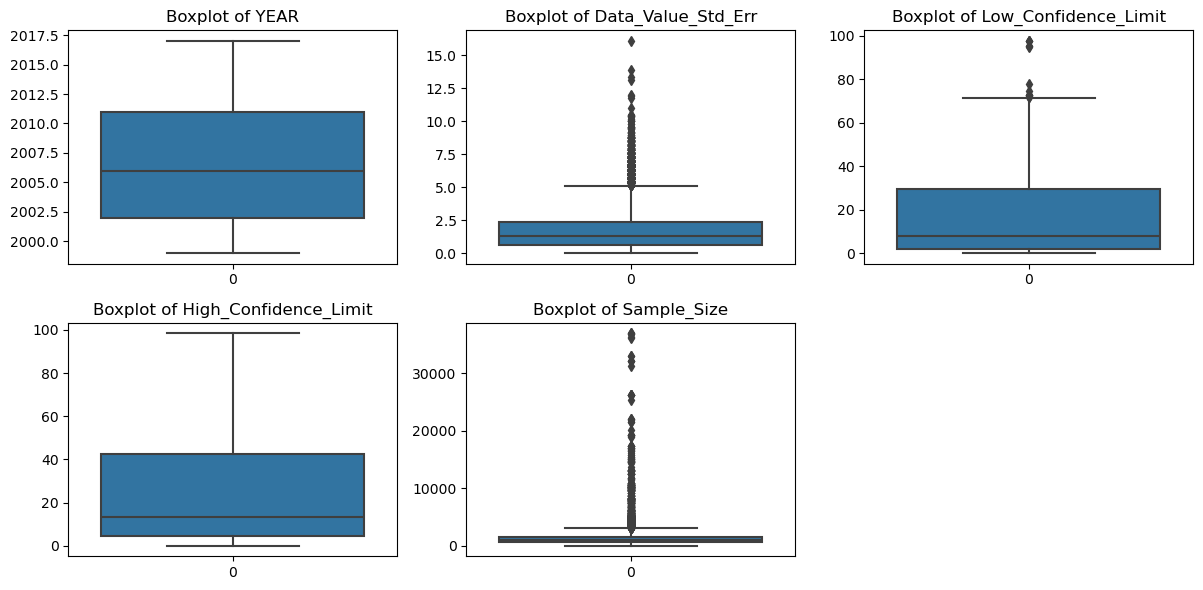

In [29]:
# Step 3: Identify Outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

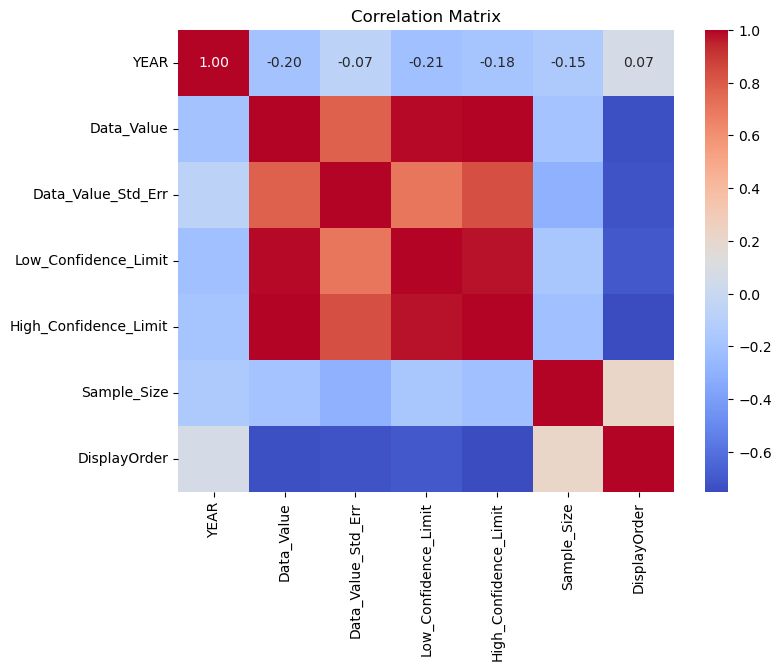

In [30]:
# Step 4: Correlation Analysis (Exclude non-numeric columns)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Additional Analysis: Check for null values in the DataFrame
all_null = data.isnull().all().all()
if all_null:
    print("All values in the DataFrame are null.")
else:
    print("Not all values in the DataFrame are null.")

Not all values in the DataFrame are null.


In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/vijethjayashekar/Documents/SEM 3/AIT 664/Project/cleaned_youth_tobacco_data.csv"
data = pd.read_csv(file_path)

# Print column names to identify the correct column
print(data.columns)

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId',
       'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2',
       'StratificationID3', 'StratificationID4', 'SubMeasureID',
       'DisplayOrder'],
      dtype='object')


In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/vijethjayashekar/Documents/SEM 3/AIT 664/Project/cleaned_youth_tobacco_data.csv"
data = pd.read_csv(file_path)

# Calculate the threshold (50%)
threshold = 50

# Create a binary target variable based on the threshold
data['Target'] = (data['Data_Value'] > threshold).astype(int)

# Display the first few rows of the dataframe with the new target variable
print(data.head())


   YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureDesc DataSource  Response  \
0          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
1          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
2  Smokeless Tobacco Use (Youth)     User Status        YTS  Frequent   
3          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
4  Smokeless Tobacco Use (Youth)     User Status        YTS      Ever   

  Data_Value_Unit Data_Value_Type  ...  TopicTypeId  TopicId  MeasureId  \
0               %      Percentage  ...          BEH   106BEH     166SSA   
1             

In [ ]:
#RANDOM FOREST

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['LocationAbbr', 'TopicType', 'TopicDesc', 'MeasureDesc', 'Data_Value_Type', 'Gender', 'Race', 'Age', 'Education']

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))

# Replace categorical columns with one-hot encoded columns
X.drop(columns=categorical_cols, inplace=True)
X_encoded.index = X.index
X = pd.concat([X, X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/bk/mltz2v155_n09wzl63g0rd7r0000gn/T/ipykernel_3006/1488678588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=categorical_cols, inplace=True)
/var/folders/bk/mltz2v155_n09wzl63g0rd7r0000gn/T/ipykernel_3006/1488678588.py:13: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X = pd.concat([X

Accuracy: 0.8973214285714286


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)  # <-- Use y_pred_proba here

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8973214285714286
Precision: 0.7385159010600707
Recall: 0.6111111111111112
F1-score: 0.6688000000000001
ROC-AUC Score: 0.9090947200737807
Confusion Matrix:
[[1600   74]
 [ 133  209]]


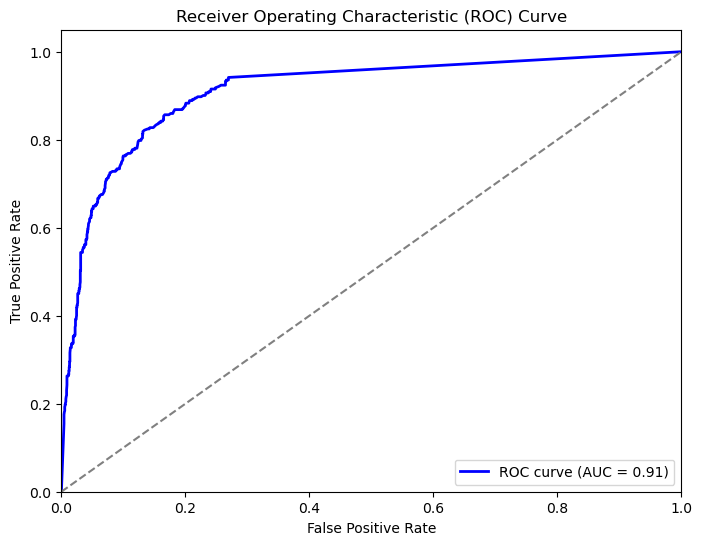

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create and train the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_classifier.predict(X_test_encoded)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

In [14]:
from sklearn.feature_selection import SelectFromModel

# Train a random forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a selector object that will use the random forest model to identify
# features with importance greater than a certain threshold
selector = SelectFromModel(random_forest, threshold='median')

# Apply the selector to the encoded training set
X_train_selected = selector.fit_transform(X_train_encoded, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Filter the feature names based on the selected feature indices
selected_feature_names = X_train_encoded.columns[selected_feature_indices]

# Apply the selector to the encoded test set
X_test_selected = selector.transform(X_test_encoded)

# Train a logistic regression model using only the selected features
logistic_classifier_selected = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test data using the model with selected features
y_pred_logistic_selected = logistic_classifier_selected.predict(X_test_selected)

# Calculate accuracy
accuracy_logistic_selected = accuracy_score(y_test, y_pred_logistic_selected)
print("Logistic Regression Accuracy with Selected Features:", accuracy_logistic_selected)


Logistic Regression Accuracy with Selected Features: 0.8993055555555556


In [15]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Create RFE selector
rfe_selector = RFE(estimator=logistic_regression, n_features_to_select=5, step=1)

# Fit RFE selector on the encoded training data
rfe_selector.fit(X_train_encoded, y_train)

# Get selected features
selected_features = X_train_encoded.columns[rfe_selector.support_]

# Filter the training and test sets based on selected features
X_train_rfe_selected = X_train_encoded[selected_features]
X_test_rfe_selected = X_test_encoded[selected_features]

# Train a logistic regression model using selected features
logistic_regression_rfe = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_rfe.fit(X_train_rfe_selected, y_train)

# Make predictions on the test data using the model with selected features
y_pred_logistic_rfe = logistic_regression_rfe.predict(X_test_rfe_selected)

# Calculate accuracy
accuracy_logistic_rfe = accuracy_score(y_test, y_pred_logistic_rfe)
print("Logistic Regression Accuracy with RFE Selected Features:", accuracy_logistic_rfe)


Logistic Regression Accuracy with RFE Selected Features: 0.902281746031746


Confusion Matrix:
[[1558  116]
 [  81  261]]


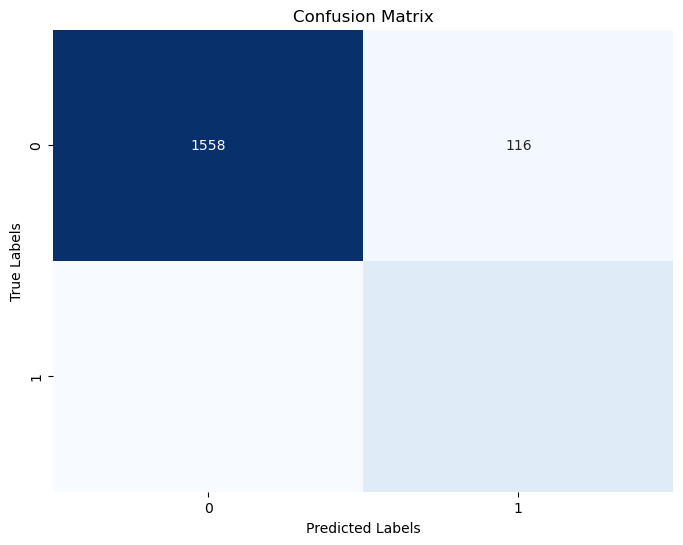

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic_rfe)

# Print confusion matrix in a readable format
print("Confusion Matrix:")
print(conf_matrix)


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision
precision = precision_score(y_test, y_pred_logistic)

# Calculate recall
recall = recall_score(y_test, y_pred_logistic)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_logistic)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_logistic)  # Use y_prob_logistic here

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)


Precision: 0.7232704402515723
Recall: 0.672514619883041
F1-score: 0.6969696969696969
ROC-AUC Score: 0.9388672298029023


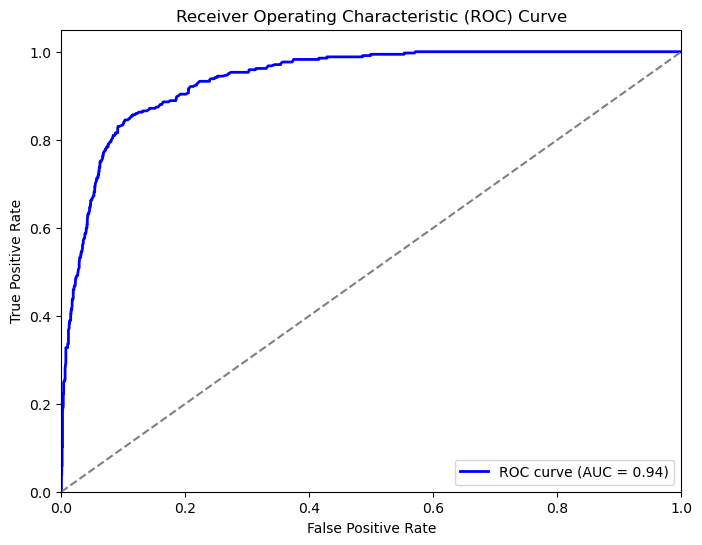

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_prob_logistic = logistic_classifier.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#GRADIENT BOOSTING

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Creating the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the test data (probabilities)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Making predictions on the test data (labels)
y_pred_gb = gb_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)  # Use predicted probabilities for ROC-AUC

# Print evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print("ROC-AUC Score:", roc_auc_gb)


Gradient Boosting Classifier Metrics:
Accuracy: 0.9017857142857143
Precision: 0.7195121951219512
Recall: 0.6900584795321637
F1-score: 0.7044776119402986
ROC-AUC Score: 0.9461404906132316


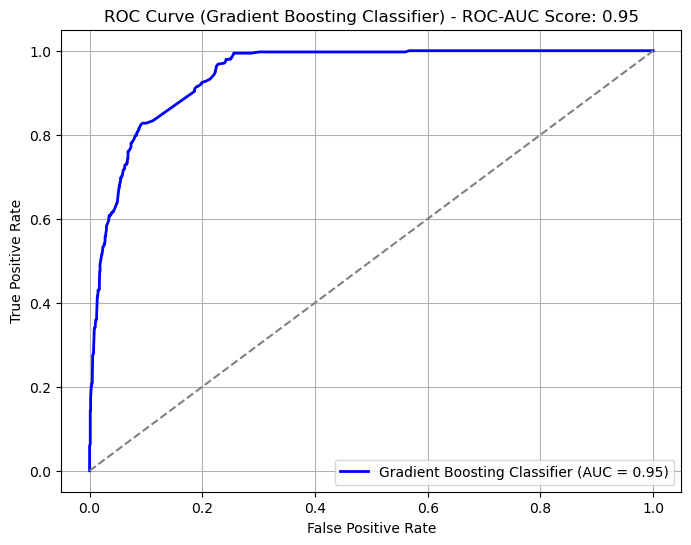

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Calculate AUC score
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve with the correct AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='Gradient Boosting Classifier (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting Classifier) - ROC-AUC Score: %0.2f' % roc_auc_gb)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Confusion Matrix:
[[1582   92]
 [ 106  236]]


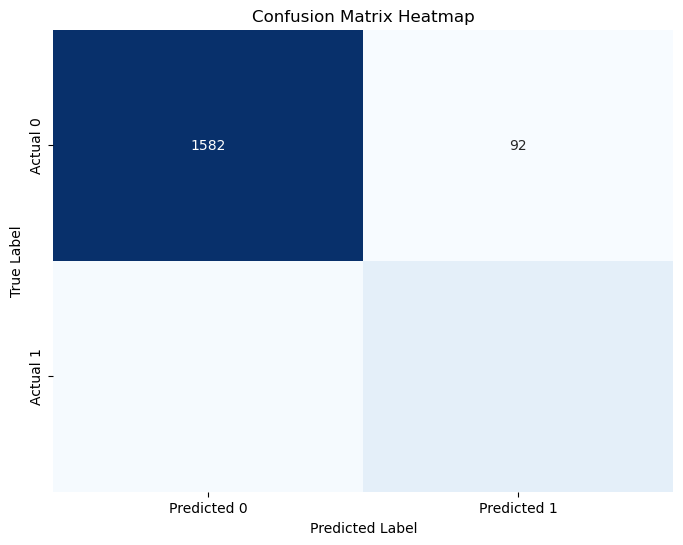

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
